<a href="https://colab.research.google.com/github/AkshataShanmugam/HumanActivityRecognitionModels/blob/main/ET_401_P4_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy on the test set (Logistic Regression): 0.48795386650416894
Confusion Matrix for Logistic Regression:
[[    0  3323   243     0     0 14528]
 [    0 26085  3756    54     0 29744]
 [    0  2440  6120     0     0  3558]
 [    0  1315     0     0     0  8216]
 [    0  4752   343     1     0 17288]
 [    0 12619  1175     1     0 66288]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00     18094
           1       0.52      0.44      0.47     59639
           2       0.53      0.51      0.52     12118
           3       0.00      0.00      0.00      9531
           4       1.00      0.00      0.00     22384
           5       0.47      0.83      0.60     80083

    accuracy                           0.49    201849
   macro avg       0.59      0.30      0.27    201849
weighted avg       0.57      0.49      0.41    201849

Cross-Validation Scores for Logistic Regression: [0.5018603  0.47

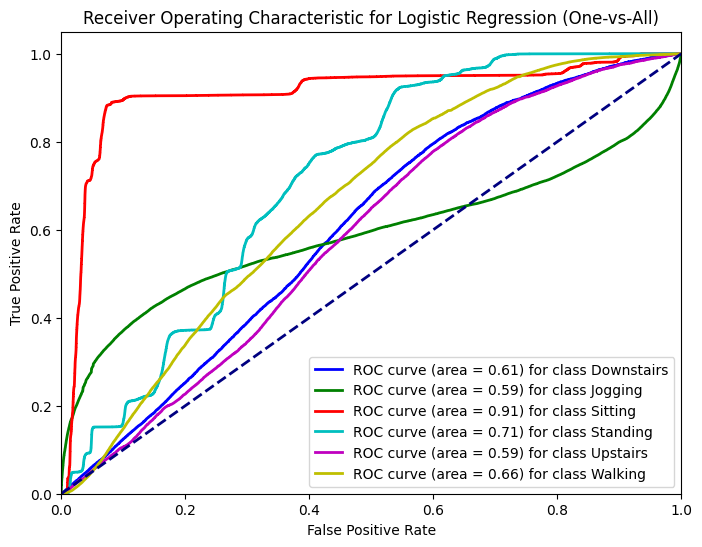

[LightGBM] [Info] Total Bins 1056
[LightGBM] [Info] Number of data points in the train set: 807393, number of used features: 5
[LightGBM] [Info] Start training from score -2.417172
[LightGBM] [Info] Start training from score -1.213263
[LightGBM] [Info] Start training from score -2.826346
[LightGBM] [Info] Start training from score -3.033768
[LightGBM] [Info] Start training from score -2.205208
[LightGBM] [Info] Start training from score -0.926315
Accuracy on the test set (LightGBM): 0.9443494889744314
Confusion Matrix for LightGBM:
[[13785   162     4    23  4052    68]
 [  104 57663     1     9   135  1727]
 [    2     0 12113     0     1     2]
 [    9     5     0  9502     8     7]
 [ 2893   419     1    32 18915   124]
 [   76  1099     1    17   252 78638]]
Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79     18094
           1       0.97      0.97      0.97     59639
           2       1.00     

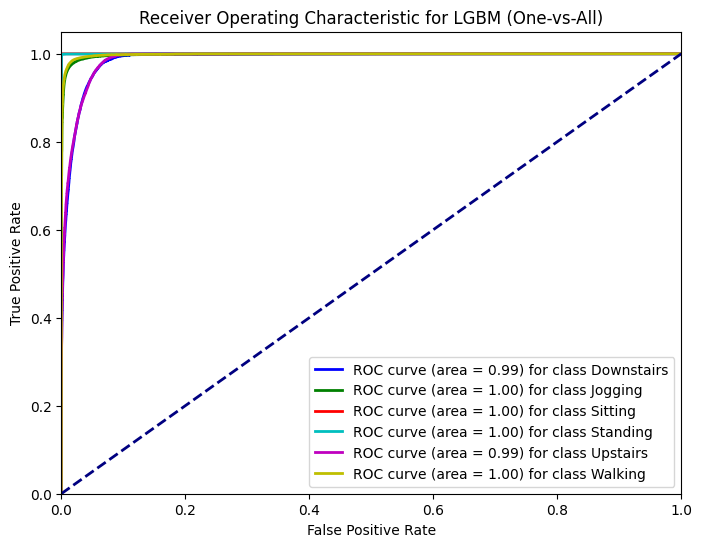

Accuracy on the test set (XGBoost): 0.9486645958117207
Confusion Matrix for XGBoost:
[[13953    91     3    16  3919   112]
 [   60 57952     1     2   105  1519]
 [    1     1 12116     0     0     0]
 [    6     5     0  9508    10     2]
 [ 2909   309     0    26 19036   104]
 [  140   850     1     0   170 78922]]
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79     18094
           1       0.98      0.97      0.98     59639
           2       1.00      1.00      1.00     12118
           3       1.00      1.00      1.00      9531
           4       0.82      0.85      0.83     22384
           5       0.98      0.99      0.98     80083

    accuracy                           0.95    201849
   macro avg       0.93      0.93      0.93    201849
weighted avg       0.95      0.95      0.95    201849

Cross-Validation Scores for XGBoost: [0.38783942 0.30937978 0.40874817 0.35813582 0.26458523]


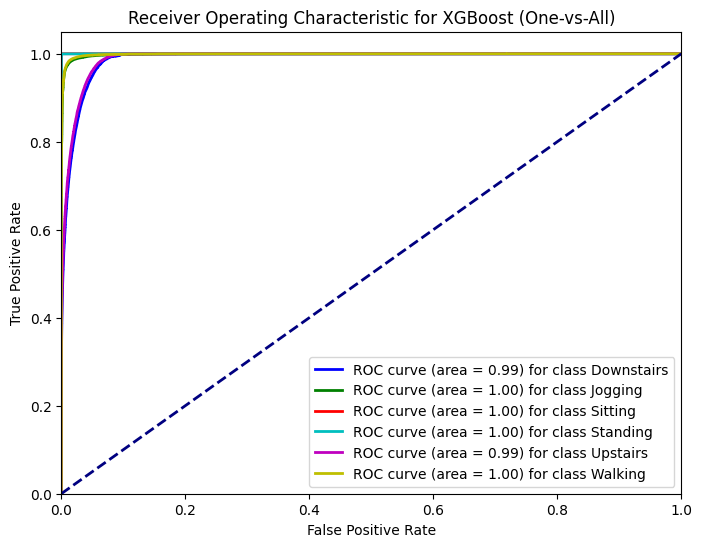

Accuracy on the test set (Decision Tree): 0.9936090840182513
Confusion Matrix for Decision Tree:
[[17782    73     1     3   215    20]
 [   33 59386     7     3    31   179]
 [    0     2 12110     0     1     5]
 [    2     0     1  9524     2     2]
 [  245   106     3     2 22002    26]
 [   15   287     5     5    16 79755]]
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18094
           1       0.99      1.00      0.99     59639
           2       1.00      1.00      1.00     12118
           3       1.00      1.00      1.00      9531
           4       0.99      0.98      0.99     22384
           5       1.00      1.00      1.00     80083

    accuracy                           0.99    201849
   macro avg       0.99      0.99      0.99    201849
weighted avg       0.99      0.99      0.99    201849

Cross-Validation Scores for Decision Tree: [0.34741317 0.20051127 0.35612936 0.28789

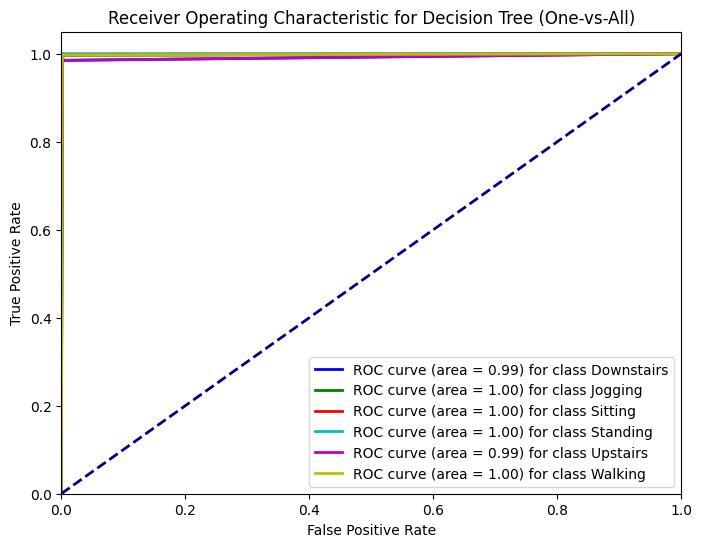

Accuracy on the test set (Random Forest): 0.9914193283097761
Best Random Forest Model Accuracy: 0.9916174962471946
Best Random Forest Model Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


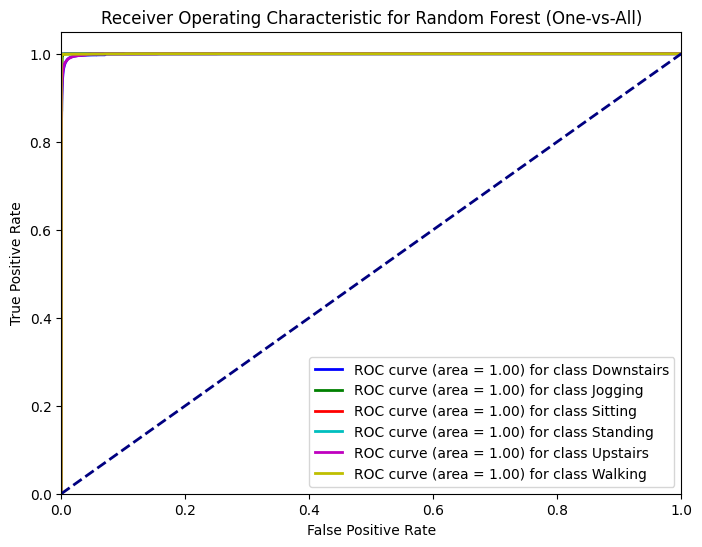

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

# Load the dataset
data = pd.read_csv('data.csv')

# Encode the activity labels as numerical values
label_encoder = LabelEncoder()
data['activity'] = label_encoder.fit_transform(data['activity'])

# Split the data into features and target
X = data[['user', 'timestamp', 'x-acceleration', 'y-acceleration', 'z-acceleration']]
y = data['activity']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#############################################
# Create and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Calculate and print the accuracy of the logistic regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy on the test set (Logistic Regression):", accuracy_logistic)

# Calculate the confusion matrix for logistic regression
confusion_logistic = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix for Logistic Regression:")
print(confusion_logistic)

# Calculate precision, recall, and F1-score with control over zero division
classification_report_logistic = classification_report(y_test, y_pred_logistic, zero_division=1)
print("Classification Report for Logistic Regression:")
print(classification_report_logistic)

# Cross-validation for logistic regression
cv_scores = cross_val_score(logistic_model, X, y, cv=5)
print("Cross-Validation Scores for Logistic Regression:", cv_scores)

# Visualize ROC curves for Logistic Regression (one-vs-all)
y_score = logistic_model.predict_proba(X_test)

n_classes = len(label_encoder.classes_)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], label_encoder.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression (One-vs-All)')
plt.legend(loc="lower right")
plt.show()

#############################################

# Create and train the LightGBM model
# lgb_model = lgb.LGBMClassifier()  # Initialize the LightGBM classifier
lgb_model = lgb.LGBMClassifier(force_row_wise=True)

lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Calculate and print the accuracy of the LightGBM model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print("Accuracy on the test set (LightGBM):", accuracy_lgb)

# Calculate the confusion matrix for LightGBM
confusion_lgb = confusion_matrix(y_test, y_pred_lgb)
print("Confusion Matrix for LightGBM:")
print(confusion_lgb)

# Calculate precision, recall, and F1-score
classification_report_lgb = classification_report(y_test, y_pred_lgb)
print("Classification Report for LightGBM:")
print(classification_report_lgb)

# Cross-validation for LightGBM
cv_scores_lgb = cross_val_score(lgb_model, X, y, cv=5)
print("Cross-Validation Scores for LightGBM:", cv_scores_lgb)

# Visualize ROC curves for LightGBM (one-vs-all)
y_score_lgb = lgb_model.predict_proba(X_test)

n_classes = len(label_encoder.classes_)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score_lgb[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], label_encoder.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LGBM (One-vs-All)')
plt.legend(loc="lower right")
plt.show()

#############################################

# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier()  # Initialize the XGBoost classifier
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate and print the accuracy of the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy on the test set (XGBoost):", accuracy_xgb)

# Calculate the confusion matrix for XGBoost
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix for XGBoost:")
print(confusion_xgb)

# Calculate precision, recall, and F1-score
classification_report_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report for XGBoost:")
print(classification_report_xgb)

# Cross-validation for XGBoost
cv_scores_xgb = cross_val_score(xgb_model, X, y, cv=5)
print("Cross-Validation Scores for XGBoost:", cv_scores_xgb)

# Visualize ROC curves for XGBoost (one-vs-all)
y_score_xgb = xgb_model.predict_proba(X_test)

n_classes = len(label_encoder.classes_)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score_xgb[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], label_encoder.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for XGBoost (One-vs-All)')
plt.legend(loc="lower right")
plt.show()

#############################################

# Create and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Calculate and print the accuracy of the Decision Tree model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Accuracy on the test set (Decision Tree):", accuracy_decision_tree)

# Calculate the confusion matrix for the Decision Tree
confusion_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
print("Confusion Matrix for Decision Tree:")
print(confusion_decision_tree)

# Calculate precision, recall, and F1-score
classification_report_decision_tree = classification_report(y_test, y_pred_decision_tree)
print("Classification Report for Decision Tree:")
print(classification_report_decision_tree)

# Cross-validation for the Decision Tree
cv_scores_decision_tree = cross_val_score(decision_tree_model, X, y, cv=5)
print("Cross-Validation Scores for Decision Tree:", cv_scores_decision_tree)

# Visualize ROC curves for Decision Tree (one-vs-all)
n_classes = len(label_encoder.classes_)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    y_one_vs_all = (y_test == i)
    y_score = decision_tree_model.predict_proba(X_test)[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_one_vs_all, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], label_encoder.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree (One-vs-All)')
plt.legend(loc="lower right")
plt.show()

#############################################

# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("Accuracy on the test set (Random Forest):", accuracy_random_forest)

# Hyperparameter Tuning (Random Forest)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print("Best Random Forest Model Accuracy:", accuracy_best_rf)
print("Best Random Forest Model Parameters:", best_rf_model.get_params())

# Visualize ROC curves for Random Forest (one-vs-all)
y_score_rf = random_forest_model.predict_proba(X_test)

n_classes = len(label_encoder.classes_)
fpr_rf = {}
tpr_rf = {}
roc_auc_rf = {}

for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test, y_score_rf[:, i], pos_label=i)
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_rf[i], tpr_rf[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc_rf[i], label_encoder.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest (One-vs-All)')
plt.legend(loc="lower right")
plt.show()

#############################################


